In [1]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [12]:
bg_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.bg-en.bg', sep='utf-8', header=None, names=['Sentence'], engine='python')
cs_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.cs-en.cs', sep='utf-8', header=None, names=['Sentence'], engine='python')
da_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.da-en.da', sep='utf-8', header=None, names=['Sentence'], engine='python')
de_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.de-en.de', sep='utf-8', header=None, names=['Sentence'], engine='python')
el_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.el-en.el', sep='utf-8', header=None, names=['Sentence'], engine='python')
et_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.et-en.et', sep='utf-8', header=None, names=['Sentence'], engine='python')
fi_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.fi-en.fi', sep='utf-8', header=None, names=['Sentence'], engine='python')
fr_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.fr-en.fr', sep='utf-8', header=None, names=['Sentence'], engine='python')
hu_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.hu-en.hu', sep='utf-8', header=None, names=['Sentence'], engine='python')
it_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.it-en.it', sep='utf-8', header=None, names=['Sentence'], engine='python')
lt_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.lt-en.lt', sep='utf-8', header=None, names=['Sentence'], engine='python')
lv_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.lv-en.lv', sep='utf-8', header=None, names=['Sentence'], engine='python')
nl_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.nl-en.nl', sep='utf-8', header=None, names=['Sentence'], engine='python')
pl_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pl-en.pl', sep='utf-8', header=None, names=['Sentence'], engine='python')
pt_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pt-en.pt', sep='utf-8', header=None, names=['Sentence'], engine='python')
ro_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.ro-en.ro', sep='utf-8', header=None, names=['Sentence'], engine='python')
sk_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sk-en.sk', sep='utf-8', header=None, names=['Sentence'], engine='python')
sl_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sl-en.sl', sep='utf-8', header=None, names=['Sentence'], engine='python')
sv_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sv-en.sv', sep='utf-8', header=None, names=['Sentence'], engine='python')

In [13]:
bg_data = bg_data.sample(6000).reset_index(drop=True)
cs_data = cs_data.sample(6000).reset_index(drop=True)
da_data = da_data.sample(6000).reset_index(drop=True)
de_data = de_data.sample(6000).reset_index(drop=True)
el_data = el_data.sample(6000).reset_index(drop=True)
et_data = et_data.sample(6000).reset_index(drop=True)
fi_data = fi_data.sample(6000).reset_index(drop=True)
fr_data = fr_data.sample(6000).reset_index(drop=True)
hu_data = hu_data.sample(6000).reset_index(drop=True)
it_data = it_data.sample(6000).reset_index(drop=True)
lt_data = lt_data.sample(6000).reset_index(drop=True)
lv_data = lv_data.sample(6000).reset_index(drop=True)
nl_data = nl_data.sample(6000).reset_index(drop=True)
pl_data = pl_data.sample(6000).reset_index(drop=True)
pt_data = pt_data.sample(6000).reset_index(drop=True)
ro_data = ro_data.sample(6000).reset_index(drop=True)
sk_data = sk_data.sample(6000).reset_index(drop=True)
sl_data = sl_data.sample(6000).reset_index(drop=True)
sv_data = sv_data.sample(6000).reset_index(drop=True)

In [14]:
translate_table = {}
for char in string.punctuation:
    translate_table[ord(char)] = None

In [15]:
languages = ['Bulgarian', 'Czech', 'Danish', 'German', 'Greek', 'Estonian', 'Finnish', 'French', 'Hungarian',
             'Italian', 'Lithuanian', 'Latvian', 'Dutch', 'Polish', 'Portuguese', 'Romanian', 'Slovak', 'Slovenian', 'Swedish', ]

In [16]:
y = []
for language in languages:
    y += [language]*6000
y = pd.DataFrame({"Language" : y})

In [17]:
all_data = [bg_data, cs_data, da_data, de_data, el_data, et_data, fi_data, fr_data, hu_data,
            it_data, lt_data, lv_data, nl_data, pl_data, pt_data, ro_data, sk_data, sl_data, sv_data]
data_combined = pd.concat(all_data).reset_index(drop=True)

In [18]:
def preprocess(data_combined):
    X = []
    data_combined = pd.DataFrame(data_combined)
    for i, line in data_combined.iterrows():
        line = line['Sentence']
        if line:
            line = line.lower()
            line = re.sub(r"\d+", "", line)
            line = line.translate(translate_table)
            X.append(line)

    return X

In [19]:
data_combined = data_combined.apply(preprocess)

In [20]:
data = pd.concat([data_combined, y], axis=1)

In [21]:
data = data.drop_duplicates()

In [22]:
x = data.iloc[:,0]
y = data.iloc[:,1]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=27)

In [24]:
len(x_train), len(x_test), len(y_train), len(y_test)

(84412, 28138, 84412, 28138)

In [36]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='word')

# Multinomial Naive Bayes

In [32]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [33]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [34]:
pred_mnb = pipe_mnb.predict(x_test)

99.75122609993603


<Axes: >

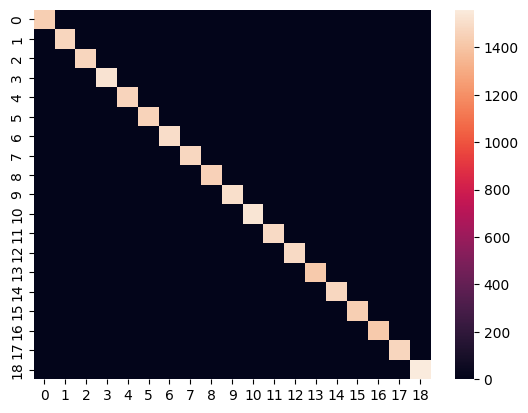

In [35]:
print(metrics.accuracy_score(y_test, pred_mnb)*100)
sns.heatmap(metrics.confusion_matrix(y_test, pred_mnb))

# Decision Tree Classifier

In [37]:
pipe_dtc = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('dtc' , DecisionTreeClassifier())
])

In [38]:
pipe_dtc.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),
                ('dtc', DecisionTreeClassifier())])

In [39]:
pred_dtc = pipe_dtc.predict(x_test)

92.49413604378421


<Axes: >

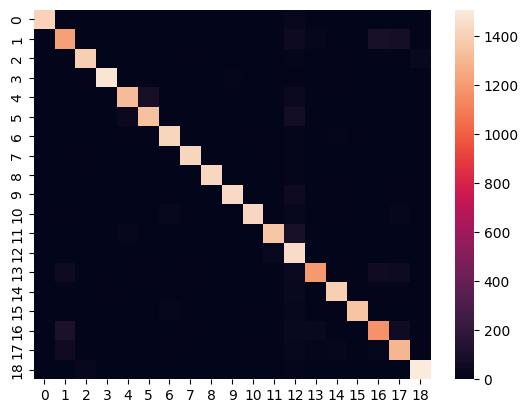

In [41]:
print(metrics.accuracy_score(y_test, pred_dtc)*100)
sns.heatmap(metrics.confusion_matrix(y_test, pred_dtc))